In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale

In [4]:
data = pd.read_csv("water.csv")
data.head()

,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [5]:
data.describe()

,X,Y
count,30.000000,30.000000
mean,90.273333,514.963333
std,16.986078,39.535096
min,62.200000,406.700000
25%,75.300000,505.250000
50%,89.150000,510.100000
75%,104.375000,519.850000
max,120.000000,578.600000


In [6]:
data.isnull().sum()

X    0
Y    0
dtype: int64

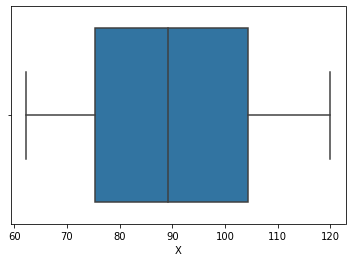

In [7]:
sns.boxplot(x=data['X'])


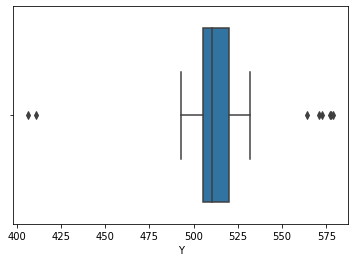

In [8]:
sns.boxplot(x=data['Y'])

In [10]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[0.90855142 1.61656054]
 [0.95645395 1.59597943]
 [0.09420832 1.43904846]
 [1.45663625 1.63714165]
 [0.49259774 1.47763804]
 [1.30095302 2.6694559 ]
 [1.46861189 0.430574  ]
 [1.68097979 1.25896373]
 [1.00156217 2.78522465]
 [0.01357238 0.20229517]
 [0.98639304 0.47756754]
 [1.52849006 0.25117531]
 [0.54648809 0.22030365]
 [0.16326781 0.12254337]
 [0.98040522 0.28461962]
 [1.4714062  0.22544892]
 [1.44146712 0.22287629]
 [0.74089254 0.12254337]
 [1.16922104 0.16370559]
 [0.9057571  0.10453489]
 [0.10019614 0.24603004]
 [0.04031797 0.05565476]
 [0.98639304 0.31291865]
 [0.66025661 0.56503726]
 [1.77997837 0.10710753]
 [0.86064888 0.05565476]
 [0.84268543 0.04021892]
 [0.50137987 0.12768865]
 [0.35767226 0.27432906]
 [0.46265865 0.18102803]]


In [11]:
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64), array([], dtype=int64))


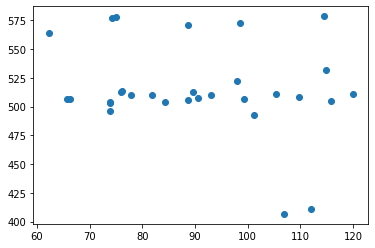

In [12]:
plt.scatter(data['X'],data['Y'])

In [14]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
iqr

X    29.075
Y    14.600
dtype: float64

In [15]:
data.shape

(30, 2)

In [16]:
data_cleared = data[~((data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)]
data_cleared.shape

(22, 2)

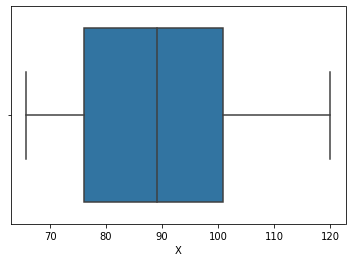

In [17]:
sns.boxplot(x=data_cleared['X'])

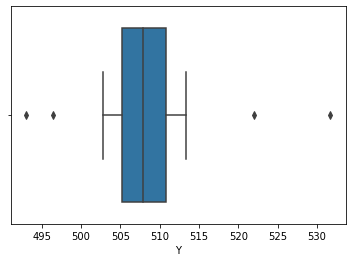

In [18]:
sns.boxplot(x=data_cleared['Y'])

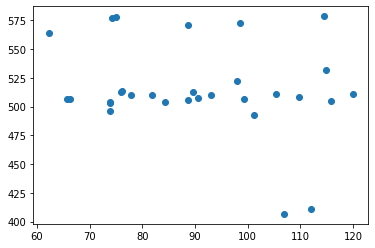

In [19]:
plt.scatter(data['X'],data['Y'])

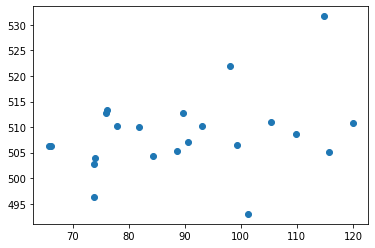

In [20]:
plt.scatter(data_cleared['X'],data_cleared['Y'])

In [24]:
data2 = data.copy()
data = data_cleared.copy()
from sklearn.model_selection import train_test_split
data_x = data['X']
data_y = data['Y']
data_x = (data_x - data_x.min())/(data_x.max() - data_x.min())
data_y = (data_y - data_y.min())/(data_y.max() - data_y.min())
data_x
data_x = np.array(data_x)
data_y = np.array(data_y)
datas =[]
for i in range(len(data_x)):
  datas.append([data_x[i],data_y[i]])
datas[1:10]

[[0.45672191528545114, 0.364341085271318],
 [0.14917127071823194, 0.08785529715762205],
 [0.9226519337016574, 0.31524547803617503],
 [0.6206261510128914, 0.3462532299741592],
 [0.5027624309392265, 0.44444444444444364],
 [0.15101289134438312, 0.2816537467700249],
 [0.0, 0.3410852713178288],
 [0.009208103130755065, 0.34366925064599474],
 [0.22467771639042364, 0.44444444444444364]]

In [25]:
data_train,data_test = train_test_split(datas,test_size=0.1)

In [26]:
data_train

[[0.5027624309392265, 0.44444444444444364],
 [0.8121546961325966, 0.40310077519379856],
 [0.9042357274401472, 1.0],
 [0.14917127071823194, 0.08785529715762205],
 [0.7311233885819522, 0.4625322997416009],
 [0.3425414364640883, 0.2919896640826873],
 [0.45672191528545114, 0.364341085271318],
 [0.6206261510128914, 0.3462532299741592],
 [0.19337016574585636, 0.5271317829457353],
 [1.0, 0.4599483204134365],
 [0.6556169429097605, 0.0],
 [0.4217311233885818, 0.3204134366925055],
 [0.1878453038674034, 0.5116279069767424],
 [0.15101289134438312, 0.2816537467700249],
 [0.44014732965009196, 0.5116279069767424],
 [0.009208103130755065, 0.34366925064599474],
 [0.5948434622467771, 0.7493540051679578],
 [0.0, 0.3410852713178288],
 [0.22467771639042364, 0.44444444444444364]]

In [27]:
m = 1
c = -1
iter = 1
epochs = 300
alpha = 0.1
error = []
data_train

[[0.5027624309392265, 0.44444444444444364],
 [0.8121546961325966, 0.40310077519379856],
 [0.9042357274401472, 1.0],
 [0.14917127071823194, 0.08785529715762205],
 [0.7311233885819522, 0.4625322997416009],
 [0.3425414364640883, 0.2919896640826873],
 [0.45672191528545114, 0.364341085271318],
 [0.6206261510128914, 0.3462532299741592],
 [0.19337016574585636, 0.5271317829457353],
 [1.0, 0.4599483204134365],
 [0.6556169429097605, 0.0],
 [0.4217311233885818, 0.3204134366925055],
 [0.1878453038674034, 0.5116279069767424],
 [0.15101289134438312, 0.2816537467700249],
 [0.44014732965009196, 0.5116279069767424],
 [0.009208103130755065, 0.34366925064599474],
 [0.5948434622467771, 0.7493540051679578],
 [0.0, 0.3410852713178288],
 [0.22467771639042364, 0.44444444444444364]]

In [28]:
while (iter<=epochs):
  der_m = 0
  der_c = 0
  err = 0
  for i in range(0,len(data_train)):
    der_m +=((data_train[i][1]-(m*data_train[i][0])-c))*(data_train[i][0])
    der_c +=(data_train[i][1]-(m*data_train[i][0])-c)
  err = (der_c)**2
  err = (err)/(2*len(data_train))
  error.append(err)
  der_m = (-1)*(1/len(data_train))*der_m
  der_c = (-1)*(1/len(data_train))*der_c
  change_m = (-1)*alpha*der_m
  change_c = (-1)*alpha*der_c
  m = m + change_m
  c = c + change_c
  iter = iter + 1
print("m=",m,"\nc=",c)

m= 0.3966369568038708 
c= 0.2354807220826589


In [29]:
data_test = np.array(data_test)
data_test_x = data_test[:,0]
print(data_test_x)
data_test_y = data_test[:,1]
data_test_y

[0.92265193 0.14917127 0.29834254]


array([0.31524548, 0.25322997, 0.43927649])

In [30]:
pred = []
for i in range(len(data_test_x)):
  print((m*data_test_x[i]) +c)
  pred.append((m*data_test_x[i]) +c)

0.601438577255291
0.2946475609429048
0.35381439980315077


In [31]:
mse = 0
for i in range(0,len(data_test)):
  mse += (data_test[i][1] - (m*data_test[i][0]) - c)**2
mse = mse/len(data_test)
print("Mean Square Error:",mse)

Mean Square Error: 0.030308558225482073


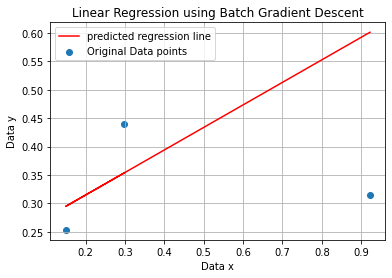

In [32]:
plt.scatter(data_test_x,data_test_y,label="Original Data points")
plt.plot(data_test_x,pred,'r',label="predicted regression line")
plt.title("Linear Regression using Batch Gradient Descent")
plt.xlabel("Data x")
plt.ylabel("Data y")
plt.grid()
plt.legend()
plt.show()

In [33]:
data_train = pd.DataFrame(data_train)
data_train_pred = m*data_train[0] + c
data_train_pred 

0     0.434895
1     0.557611
2     0.594134
3     0.294648
4     0.525471
5     0.371345
6     0.416634
7     0.481644
8     0.312178
9     0.632118
10    0.495523
11    0.402755
12    0.309987
13    0.295378
14    0.410059
15    0.239133
16    0.471418
17    0.235481
18    0.324596
Name: 0, dtype: float64

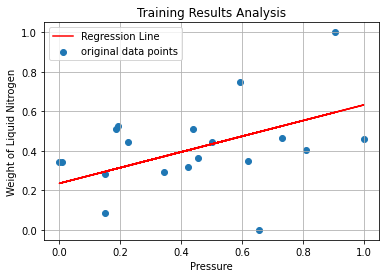

In [34]:
plt.plot(data_train[0],data_train_pred,'red',label="Regression Line")
plt.scatter(data_train[0],data_train[1],label="original data points")
plt.xlabel("Pressure")
plt.ylabel("Weight of Liquid Nitrogen")
plt.legend()
plt.grid()
plt.title("Training Results Analysis")
plt.show()
%matplotlib inline

In [35]:
data_train.head()

,0,1
0,0.502762,0.444444
1,0.812155,0.403101
2,0.904236,1.000000
3,0.149171,0.087855
4,0.731123,0.462532


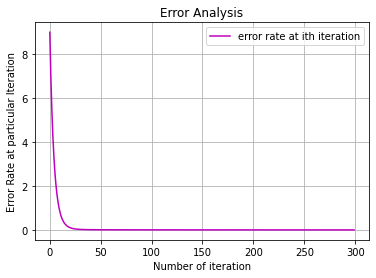

In [36]:
iters = np.arange(epochs)
plt.plot(iters,error,color='m',label="error rate at ith iteration")
plt.legend()
plt.xlabel("Number of iteration")
plt.ylabel("Error Rate at particular Iteration")
plt.title("Error Analysis")
plt.grid()
plt.show()


In [37]:
mse = 0
mse = (data_train[1] - m*data_train[0] - c)**2
mse.sum()/len(data_train)

0.03977919037528458

In [39]:
min_x = data2['X'].min()
max_x = data2['X'].max()
min_y = data2['Y'].min()
max_y = data2['Y'].max()

In [40]:
input_x = float(input("Enter Pressure: "))
input_x = (input_x - min_x)/(max_x - min_x)
output_y = m*input_x + c
output_y = (output_y)*(max_y - min_y) + min_y
output_y

Enter Pressure: 75.1


504.7703524187446